In [1]:
# Automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../../FastAi")
print(sys.path)

['', '/home/sindre/anaconda3/envs/fastai/lib/python36.zip', '/home/sindre/anaconda3/envs/fastai/lib/python3.6', '/home/sindre/anaconda3/envs/fastai/lib/python3.6/lib-dynload', '/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages', '/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions', '/home/sindre/.ipython', '../../FastAi']


In [3]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# TODO
> Refactor the methods 

# Downloading the images

Downloading the images using a program from https://github.com/hardikvasa/google-images-download and running it through bash scripting locally in the notebook. More possible configurations, such as multiple searchwords, different combinations, etc., but this is enough for now. 

To run this method:
> Using pip
> <div class="alert alert-block alert-info">
> \$ pip install google_images_download
</div> <br>
> Manually using CLI
> <div class="alert alert-block alert-info">
> \$ git clone https://github.com/hardikvasa/google-images-download.git <br>
> \$ cd google-images-download && sudo python setup.py install
> </div> <br>  
> Manually using UI
> <div class="alert alert-block alert-info">
> Go to the repo on github ==> Click on *Clone or Download* ==> Click on *Download ZIP* and save it on your local disk. </div>

<div class="alert alert-block alert-warning">
**NOTE** To download > 100 images, please see GitHub 
</div>

### The specified searchwords will be the classes, which in this case will be *female_face* and *male_face* 

In [18]:
import os

def download_pictures(searchword, form="jpg", lim=100, directory="data/"):
    ! googleimagesdownload --keywords $searchword --format $form --limit $lim --output_directory $directory --chromedriver "../../../../Downloads/chromedriver" 
    src_path = directory + searchword
    dst_train_path = directory + "train/"
    dst_valid_path = directory + "valid/"
    counter = 1
    if not os.path.isdir(dst_train_path + searchword and dst_valid_path + searchword):
        train_search_folder = dst_train_path + searchword
        valid_search_folder = dst_valid_path + searchword
        print(train_search_folder)
        ! mkdir $train_search_folder
        ! mkdir $valid_search_folder
    for file in os.listdir(src_path):
        src = src_path + "/" + file
        dst_end = searchword + "/" + searchword + "." + str(counter) + "." + form
        train_ratio = lim*0.7 
        if(counter <= train_ratio):
            dst = dst_train_path + dst_end
        else:
            dst = dst_valid_path + dst_end
        os.rename(src, dst)
        counter = counter + 1
    delete_dir = directory + searchword
    ! rm -rf $delete_dir

In [85]:
download_pictures("Female_face", lim=1000);
download_pictures("Male_face", lim=1000);


Item no.: 1 --> Item name = Female_face
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1. archetypal-female-_3249633c.jpg
Completed Image ====> 2. 9aa0c4d51c6be64845bacbe26a738544.jpg
Completed Image ====> 3. dc5ccad5bd921a27a657ecfada3f00de--live-life-anti-aging.jpg
Completed Image ====> 4. closeup-beautiful-female-face-isolated-23885901.jpg
Completed Image ====> 5. stock-photo-beauty-portrait-of-female-face-with-natural-skin-519563191.jpg
Completed Image ====> 6. 9b71c869b0deb10121858118e381edea.jpg
Completed Image ====> 7. close-up-beautiful-female-face-21789058.jpg
Completed Image ====> 8. girl-face-sketch-by-eugene-fokin-on-artstation_female-face-reference-images-faces-fa-on-anatomy-d-models-for-downl.jpg
Completed Image ====> 9. female-portrait3.jpg
Completed Image ====> 10. stock-photo-beauty-face-of-the-young-beautiful-woman-isolated-on-white-gorgeous-female-portrait-with-slicked-7235342

Completed Image ====> 106. stock-photo-beauty-woman-face-portrait-beautiful-spa-model-girl-with-perfect-fresh-clean-skin-brunette-female-653816020.jpg
Completed Image ====> 107. 240_f_101724466_do7aybo19r39ptvx6qqimjwzudphxrr1.jpg
Completed Image ====> 108. preview.jpg
Completed Image ====> 109. beautymask.jpg
Completed Image ====> 110. 4c88c023bbc3e486b08982ad073a6a17--face-photo-brazilian-models.jpg
Completed Image ====> 111. ad_212876845.jpg
Completed Image ====> 112. person-1178845_960_720.jpg
Completed Image ====> 113. 101112_ten241.jpg
Completed Image ====> 114. rexfeatures_5002676t-333x500.jpg&q=82.jpg
Completed Image ====> 115. 364d491c00000578-3691691-image-a-2_1468574501368.jpg
Completed Image ====> 116. how-to-draw-a-female-face-1.jpg
Completed Image ====> 117. 58fe478d7522ca1b008b5d4e-750-750.jpg
Completed Image ====> 118. 12231-close-up-female-face.jpg
Completed Image ====> 119. bigstock-beauty-asian-female-face-with-80681022-e1462605515891.jpg
Completed Image ====> 120. f

Completed Image ====> 216. 171122131121-lumpen-agency-3.jpg
Completed Image ====> 217. mts_mishnumber1-202881-face6.jpg
Completed Image ====> 218. laser-face-thumb.jpg
Completed Image ====> 219. bc6dd84ab48f40e09f5b4f0409c5471c--female-model-face-faces-female.jpg
Completed Image ====> 220. the-vintage-glam-look.jpg
Completed Image ====> 221. 12.jpg
Completed Image ====> 222. mole-meanings-on-face-female-218x150.jpg
Completed Image ====> 223. woman_face_by_shantalla-d4wmoys.jpg
Completed Image ====> 224. 65866_poster_woman_face_1.jpg
Completed Image ====> 225. realistic-drawing-of-face-penci-art-drawings-female-faces-artsy-pinterest-female-download.jpg
Completed Image ====> 226. f5.large.jpg
Completed Image ====> 227. 180115_r31298.jpg
Completed Image ====> 228. sara-gelser-person-of-year-2017-time-magazine-2.jpg
Completed Image ====> 229. 0e50afee-0c21-4559-9e04-74baa88ad133_16x9_788x442.jpg
Completed Image ====> 230. 72f167293037cb92e792dab137cedf7b--face-reference-woman-face.jpg
Comp

Completed Image ====> 328. female-face-flower-logo-vector-12226878.jpg
Completed Image ====> 329. female-face-shapes-woman-face-types-chart-vector-icon-illustration-vector-id614860902.jpg
Completed Image ====> 330. stock-photo-portrait-of-beautiful-young-asian-woman-with-flawless-skin-and-perfect-make-up-443488717.jpg
Completed Image ====> 331. stock-vector-happy-women-s-day-greeting-card-with-female-face-vector-388402843.jpg
Completed Image ====> 332. female-face-woman-smiling_rwx81u_vg_thumbnail-small01.jpg
Completed Image ====> 333. red-apple-with-winking-female-face-download-royalty-free-vector-file-eps-18110.jpg
Completed Image ====> 334. johanna-cranston-femaleface2.jpg
Completed Image ====> 335. videoblocks-young-women-scrubbing-trough-computer-code-female-face-with-binary-code-projections_r5oehmnaz_thumbnail-small01.jpg
Completed Image ====> 336. canva-female-face-makeup-macriuzlwi8.jpg
Completed Image ====> 337. paper-cut-male-and-female-face-illustration_csp16826421.jpg
Compl

Completed Image ====> 426. portrait-african-women-dark-skin-female-face-with-hair-afro-and-metal-vector-id917040124.jpg
Completed Image ====> 427. 0ec167639762a371db8c5b345c7979e1.jpg
Completed Image ====> 428. stock-vector-wow-pop-art-female-face-sexy-surprised-woman-with-open-mouth-holding-binoculars-in-her-hands-with-625718273.jpg
Completed Image ====> 429. drawn-people-female-face-12.jpg
Completed Image ====> 430. unique-hairstyles-for-my-face-shape-female-face-hole-haircuts-round-face-hairstyle.jpg
Completed Image ====> 431. article-1355521-0d1d9ed1000005dc-156_196x278.jpg
Completed Image ====> 432. 01-pavlichenko-snajper.jpg
Completed Image ====> 433. johanna-cranston-femaleface1.jpg
Completed Image ====> 434. how-to-draw-a-female-face-with-pencil-how-to-draw-female-face-with-pencil-drawing-pencil.jpg
Completed Image ====> 435. drawn-expression-female-face-1.jpg
Completed Image ====> 436. male-female-face-and-symbol-with-heart-vector-id452740521.jpg
Completed Image ====> 437. mal

IOError on an image...trying next one... Error: timed out
Completed Image ====> 519. 6156-0-1487440464.jpg
Completed Image ====> 520. 62699-2-1483264494.jpg
Completed Image ====> 521. 961633.jpg
Completed Image ====> 522. chris-anderson-011-female-face-hair-style-3.jpg
Completed Image ====> 523. how-to-draw-a-female-face-with-pencil-face-sketch-female-how-to-draw-a-female-face-front-and-side-view.jpg
Completed Image ====> 524. female-face-vector-id165637941.jpg
Completed Image ====> 525. pandaren_female_face_guide_by_kagurou-d5dyuiq.jpg
Completed Image ====> 526. ow-ltr003-female-face-arm-tattoo-coverup-01.jpg
Completed Image ====> 527. 500_f_162634316_moxgrdqzugmjg830pbwttaqifytdfgfs.jpg
Completed Image ====> 528. female-face-outline-20.jpg
Completed Image ====> 529. female-face-profile-character-vector-14354910.jpg
Completed Image ====> 530. 500_f_115871906_azs842cs3lb4ndng47vwtiolu31bqqdg.jpg
Completed Image ====> 531. article-1355521-0d1d9ed1000005dc-800_196x278.jpg
Completed Image

Completed Image ====> 614. stock-photo-beauty-portrait-of-female-young-model-with-natural-skin-524228167.jpg
Completed Image ====> 615. young-explorer-female-face-4.jpg
Completed Image ====> 616. olgadrebas-1637-35-random-face-drawing-tips-by-shadesofnight_male-and-female-anatomy-tuts-refs-favourites-by-caninedivi-on-how-to-draw-a-head-and-female-face-anatomylife-drawi.jpg
Completed Image ====> 617. il_570xn.1248053646_djkk.jpg
Completed Image ====> 618. article-2521921-1bdbbfc0000005dc-514_310x446.jpg
Completed Image ====> 619. silhouette_10_by_faestock-d286odp.jpg
Completed Image ====> 620. 01554109.jpg
Completed Image ====> 621. pop-art-female-face-sexy-surprised-young-african-woman-with-open-mouth-and-afro-hairstyle-and-speech-bubble-art-retro-comic-style.jpg
Completed Image ====> 622. draw-face-online-32-best-how-to-draw-a-male-and-female-face-images-on-pinterest.jpg
Completed Image ====> 623. forms-of-a-female-face-vector-id165742032.jpg
Completed Image ====> 624. vector-single-s

Completed Image ====> 703. f1-british-gp-2008-female-face-of-the-british-grand-prix-and-miss-england-gemma-garrett-wi.jpg
Completed Image ====> 704. young-explorer-female-face-2.jpg
Completed Image ====> 705. silhouette_female_face_background_574489.jpg
Completed Image ====> 706. female_face_templates_by_deviant_custard-d610wts.png
Completed Image ====> 707. how-to-draw-a-female-face-with-pencil-as-well-as-how-to-draw-a-realistic-female-face-step-by-step-plus-how-to-draw-a-person-step-by-step-for-beginners-805x1288.jpeg
Completed Image ====> 708. black-square-button-with-female-face-icon-vector-id482490324?s=170667a.jpg
Completed Image ====> 709. article_on_the_female_face_page_2_by_hazardousarts-d5ej0l9.jpg
Completed Image ====> 710. stock-photo-beautiful-caucasian-thoughtful-senior-woman-272620769.jpg
Completed Image ====> 711. female-face-profile-character-vector-14355289.jpg
Completed Image ====> 712. 500_f_107377481_wauzmsbl15do3qsp4xamoh6qdekaqu7c.jpg
Completed Image ====> 713. f

Completed Image ====> 786. tumblr_inline_n91wzyyfov1skbule.jpg
Completed Image ====> 787. closeup-of-beautiful-female-face-covered-in-wet-hair-picture-id864443080.jpg
Completed Image ====> 788. abstract-female-face-desktop-wallpaper-62636-64613-hd-wallpapers.jpg
Completed Image ====> 789. female_portrait_outline_cartoon_style_symmetric_curves_decoration_6827020.jpg
Completed Image ====> 790. abstract-female-face-vector-eps-thumb.jpg
Completed Image ====> 791. female_face_tutorial_by_hazardousarts-d5ejds5.jpg
Completed Image ====> 792. full122683_97698d3f9d7c183070687c1317fd7749.jpg
Completed Image ====> 793. 12837354-beauty-female-face-logo.jpg
Completed Image ====> 794. how-to-draw-a-realistic-female-face-step-by-step-together-with-how-to-draw-people-for-beginners-in-conjunction-with-how-to-draw-a-realistic-person-step-by-step.jpg
Completed Image ====> 795. female-face-300x197.jpg
Completed Image ====> 796. a-female-face-illustrator-vector-material-60819.jpg
Completed Image ====> 797.

Completed Image ====> 20. 5pt9cwhj-900.jpg
Completed Image ====> 21. 1368573131_big-male-1.jpg
Completed Image ====> 22. 9e4401374853163c7b953abe24ba4ba2.jpg
Completed Image ====> 23. male_face_sketch_by_oka_toka-d8wmnlb.jpg
Completed Image ====> 24. black-african-man.jpg
Completed Image ====> 25. male-face-21616185.jpg
Completed Image ====> 26. 7-best-hairstyles-for-men-with-oblong-face-shape.jpg
Completed Image ====> 27. 9d6dd818dc25500244414513f73cc93b.jpg
Completed Image ====> 28. male_face_study_by_victter_le_fou-d8pr98g.jpg
Completed Image ====> 29. young-caucasian-male-face-22564733.jpg
Completed Image ====> 30. male%20androgyne.jpg
Completed Image ====> 31. 1b05cfb97517b9e04ca4c244ac0b8bc1.jpg
Completed Image ====> 32. hairstyles-for-oblong-face-shapes-side-swept-crew-cut.jpg
Completed Image ====> 33. 46413-1-1338238974.jpg
Completed Image ====> 34. pexels-photo-428341.jpeg
Completed Image ====> 35. mens-diamond-face-shape-haircut-e1406568059529.jpg
Completed Image ====> 36. _9

Completed Image ====> 150. 1118full-clement-chabernaud-588x826.jpg
Completed Image ====> 151. frank-oterholt-foto-aril-skjae-ringrud-2017-580a8269-1.jpg
Completed Image ====> 152. sean-o-pry.jpg
Completed Image ====> 153. ap17045844169345-c.jpg
Completed Image ====> 154. marlon-brando-theater-actors-photo-u5?w=650&q=50&fm=jpg&fit=crop&crop=faces.jpg
Completed Image ====> 155. injections-wrinkles-crows-feet-men.jpg
Completed Image ====> 156. cristiano-ronaldo-justin-bieber-male-celebrities-face-mask.jpg
Completed Image ====> 157. nansen11.jpg
Completed Image ====> 158. human_male_face_study_by_marrilliams.jpg
Completed Image ====> 159. 7003e1116cc4b92f7f902c154d194fd9.jpg
Completed Image ====> 160. bo-lunde_foto_robertwalmann_ifi-jpg?pid=native-contentfile-file&r_n_d=1596142_&adjust=1&x=250&from=0&q=85.jpg
Completed Image ====> 161. 595f7e7e2100003400fc5c25.jpeg
Completed Image ====> 162. hp_tm_01.jpg
Completed Image ====> 163. blake_feature-400x500.jpg
Completed Image ====> 164. male-f

Completed Image ====> 269. 331119_4_3_559.jpg
Completed Image ====> 270. henrik_h_feature-400x500.jpg
Completed Image ====> 271. gwrwgr.jpg
Completed Image ====> 272. jude_law_-_headshot.jpg
Completed Image ====> 273. santipur-_jamat_ali_sheikh_faces_d.2e16d0ba.fill-512x512.jpg
Completed Image ====> 274. trianglehairstyles.jpg
Completed Image ====> 275. 2897498778.jpg
Completed Image ====> 276. 69222200.jpg
Completed Image ====> 277. p-1-the-worlds-first-face-gym-wants-to-make-your-head-sweat.jpg
Completed Image ====> 278. 95339787d31bac1a3a244867939a61cc--male-models-hot-male-model.jpg
Completed Image ====> 279. ladarius-burtsjpg
HTTPError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> 280. brentdodson_thumb_color-1.jpg
Completed Image ====> 281. bd00ef14c1f3a9cd892fbb3a2478dacf-59f9879e4cd72-hero.jpg
Completed Image ====> 282. nicgalway.jpg
Completed Image ====> 283. master.jpg
Completed Image ====> 284. waters-e1521050151469-400x250.jpg
Compl

Completed Image ====> 377. male-face-picture_csp0010641.jpg
Completed Image ====> 378. male-face.jpg
Completed Image ====> 379. male-face-with-stubble-beard-and-side-parted-hairstyle-in-colorful-kjn9tc.jpg
Completed Image ====> 380. male-face-anatomy-stock-illustrations_csp8944975.jpg
Completed Image ====> 381. hornbach-diy-diy-store-woman-male-face-human-mass-outdoor-225160-adeevee.jpg
Completed Image ====> 382. depositphotos_60342261-stock-illustration-illustration-with-a-male-face.jpg
Completed Image ====> 383. 1318526.jpg
Completed Image ====> 384. child-boy-happy-male-face-young-kid-smile-447706.jpg
Completed Image ====> 385. thumb-3.jpg
Completed Image ====> 386. 1170x600xmale_rejouvination.jpg
Completed Image ====> 387. male-face-with-stubble-beard-and-side-parted-hairstyle-in-colorful-vector-id882337298.jpg
Completed Image ====> 388. drawn-man-male-face-13.jpg
Completed Image ====> 389. 478-0-1448725042.jpg
Completed Image ====> 390. life_drawing___male_face_by_xpinkified.jpg
C

Completed Image ====> 482. tutorial__male_face_front_view_by_kitwilkins-d38lvi4.jpg
Completed Image ====> 483. 0af183815a90762c65194dee01b8dd49.jpg
Completed Image ====> 484. hj.jpg
Completed Image ====> 485. s-l640.jpg
Completed Image ====> 486. halloween-male-face-painting-creative-face-paint-300x210.jpg
Completed Image ====> 487. vector-illustration-of-handsome-brunet-male-face-positive-face-vector-id844120412.jpg
Completed Image ====> 488. male_face_practice_by_nearfish-d5s2i6m.jpg
Completed Image ====> 489. younger-male-face-texture-2.jpg
Completed Image ====> 490. maxresdefault.jpg
Completed Image ====> 491. 500_f_144723349_ap6bcgemnxtjx6r46ecaagimpwqjvajw.jpg
Completed Image ====> 492. g3mfbmk1_pop01-daz3d.jpg
Completed Image ====> 493. draw-tutorial-step-by-step-male-face-vector-id506545894.jpg
Completed Image ====> 494. side_view_male_face_3_by_logansmith-d5fumpc.jpg
Completed Image ====> 495. 6270750776_5e8d88bfa6_b.jpg
Completed Image ====> 496. 9427000-5.jpg
Completed Image

Completed Image ====> 571. 27648.jpg
Completed Image ====> 572. xylocopa_virginica_male_face.jpg
Completed Image ====> 573. 5zof5l0ruk.jpg
Completed Image ====> 574. stock-photo-male-face-microcurrent-treatment-handsome-man-in-cosmetology-clinic-704643994.jpg
Completed Image ====> 575. best-male-face-lift-surgeon.jpg
Completed Image ====> 576. drawing-of-the-shapes-of-faces-drawing-male-face-shape-types-drawing-of-sketch.jpg
Completed Image ====> 577. obj-male-face-asian-man_d.jpg
Completed Image ====> 578. 6037-1-1241119321.jpg
Completed Image ====> 579. mmd_tda__male_face_edit__wip__by_mmdmikumikulen-d7g10m7.jpg
Completed Image ====> 580. g3mfbmk1_pop04-daz3d.jpg
Completed Image ====> 581. how+to+make+a+male+face+attractive.jpg
Completed Image ====> 582. carved-wood-face-indian-turban-front.jpg
Completed Image ====> 583. brad-pitt-gets-7-million-to-become-the-first-male-face-for-chanel-no.-5-1-630x375.jpg
Completed Image ====> 584. manga_male_face_sketch_by_acturus1.jpg
Completed Ima

Completed Image ====> 668. ce6e67dc343b532f7cf4fcacc0a032a2.jpg
Completed Image ====> 669. 10374-0-1456644516.jpg
IOError on an image...trying next one... Error: [Errno 36] File name too long: 'data//Male_face/670. ocean-hairy-male-face-sunglasses-walking-goatee-glasses-seaside-toes-nipples-arms-legs-florida-fat-sandy-tattoos-atlantic-barefoot-males-facialhair-mustache-chubby-naval-atlanticocean-descal-os-racks-chunky-hefty-bellies-armpits-tatts-bodyhair-lakeworth-hairymen-canonef70300mmf456isusm-canon60d-filosofianatural-shunshades-peekingpits-ilobsterit-maleracks-malesmale-canonefs60mmf28macrousa-llakeworthbeach-wagersedge-1092573.jpg'
Completed Image ====> 670. product.jpg
Completed Image ====> 671. men-s-shaving-brush-natural-firm-horse-hair-beard-brush-barber-male-face-mustache-beard-cleaning.jpg
Completed Image ====> 672. how-to-draw-a-male-face-as-well-as-how-to-draw-a-young-male-face-together-with-how-to-draw-a-realistic-male-face-step-by-step-with-a-pencil.jpg
Completed Image 

Completed Image ====> 746. how-to-draw-a-male-cartoon-face-together-with-how-to-draw-a-male-lion-face-plus-how-to-draw-a-male-face-anime.jpg
Completed Image ====> 747. 500_f_167223270_xeorr8pvngdpb0zk5vonkuxrrmkn70wv.jpg
Completed Image ====> 748. how-to-draw-a-male-face-with-pencil-together-with-how-to-draw-a-male-face-with-pencil-step-by-step-as-well-as-how-to-draw-a-male-face-anime.jpg
Completed Image ====> 749. male_face_3d_model_practice_by_dargonite-d6t9asm.jpg
Completed Image ====> 750. how-to-draw-anime-male-face-front-view-in-conjunction-with-how-to-draw-a-male-face-easy-plus-how-to-draw-a-black-male-face.jpg
Completed Image ====> 751. stock-photo-shoulder-and-neck-massage-for-woman-in-spa-salon-doctor-making-neck-therapy-in-rehabilitation-793581928.jpg
Completed Image ====> 752. drawing-reference-2---male-face_o_2937279.jpg
Completed Image ====> 753. royalty-free-vector-icon-button-with-male-face-icon-vector-id468488326?s=170667a.jpg
Completed Image ====> 754. reflecting-male

# Deep Learning

Utilizing a resizing method from FastAi - includes augmentation (side_on) and zooming 
    - Have the possibility of speeding up the training (smaller pictures) in the start
    - bs = 64 is usually preferred until Cuda-Out-Of-Memory Exception 

In [4]:
import os 
PATH = "data/"
os.listdir(PATH)

['models', 'valid', 'train', 'tmp']

In [5]:
train_path = "train/"
valid_path = "valid/"
print(os.listdir(PATH + train_path))
print(os.listdir(PATH + valid_path))

['Male_face', 'Female_face']
['Male_face', 'Female_face']


Possible to get a nicer output of the items in directories? 

In [6]:
class1_path = "Male_face/"
class2_path = "Female_face/"
print("Training folder: ")
print("Class1: " , os.listdir(PATH + train_path + class1_path)[:2])
print("Class2: " , os.listdir(PATH + train_path + class2_path)[:2])

print("Validation folder: ")
print("Class1: " , os.listdir(PATH + valid_path + class1_path)[:2])
print("Class2: " , os.listdir(PATH + valid_path + class2_path)[:2])

Training folder: 
Class1:  ['Male_face.400.jpg', 'Male_face.327.jpg']
Class2:  ['Female_face.193.jpg', 'Female_face.490.jpg']
Validation folder: 
Class1:  ['Male_face.715.jpg', 'Male_face.94.jpg']
Class2:  ['Female_face.823.jpg', 'Female_face.193.jpg']


In [7]:
files = os.listdir(f'{PATH}{train_path}{class1_path}')[:1]
files

['Male_face.400.jpg']

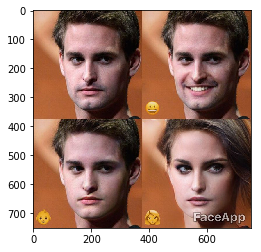

In [8]:
img = plt.imread(f'{PATH}{train_path}{class1_path}{files[0]}')
plt.imshow(img)

In [9]:
img.shape

(750, 750, 3)

In [10]:
img[:4, :4]

array([[[219, 172, 142],
        [220, 173, 145],
        [221, 174, 146],
        [222, 175, 147]],

       [[219, 172, 142],
        [220, 173, 143],
        [221, 174, 146],
        [222, 175, 147]],

       [[218, 171, 141],
        [219, 172, 142],
        [220, 173, 145],
        [222, 175, 147]],

       [[219, 170, 140],
        [220, 171, 141],
        [220, 173, 143],
        [221, 174, 146]]], dtype=uint8)

## Uncomment if needing to resize images 

> <div class="alert alert-block alert-warning">
Possible problems with it storing them in *tmp* folder
</div>

In [11]:
#from sklearn import metrics 

#def get_data(sz, bs):
#   tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#   data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
#   return data if sz > 300 else data.resize(340, 'tmp');

In [12]:
arch = resnet50
sz = 299 # One of two standards for ImageNet (224)
bs = 48 # 64 resulted in cuda-out-of-memory-error

In [13]:
tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip(), max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.4)
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.633545   0.44119    0.798687  



[0.4411896578967571, 0.7986865863204002]

## Problems because of non-valid image types

> <div class="alert alert-block alert-info">
Can use module *imghdr* to verify image types
</div>

In [14]:
import imghdr
imghdr.what(f'{PATH}{train_path}{class1_path}{files[0]}')

'jpeg'

### Need to loop through datasets to remove invalid images 

> <div class="alert alert-block alert-info">
But first, interesting to see how much data we will be losing
</div>

In [15]:
class1_train = PATH + train_path + class1_path
class2_train = PATH + train_path + class2_path
class1_valid = PATH + valid_path + class1_path
class2_valid = PATH + valid_path + class2_path

In [16]:
print(class1_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class1_path)))
print(class2_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class2_path)))
print(class1_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class1_path)))
print(class2_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class2_path)))

Male_face training files:  666
Female_face training files:  649
Male_face validation files:  180
Female_face validation files:  202


In [17]:
file_paths = [class1_train, 
              class2_train, 
              class1_valid, 
              class2_valid]
for path in file_paths:
    for files in os.listdir(path):
        if imghdr.what(path + files) != 'jpeg':
            print("Deleting " + files + " in folder " + path + ", should be " + str(imghdr.what(path+files)))
            os.remove(path + files);

In [18]:
print(class1_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class1_path)))
print(class2_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class2_path)))
print(class1_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class1_path)))
print(class2_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class2_path)))

Male_face training files:  666
Female_face training files:  649
Male_face validation files:  180
Female_face validation files:  202


### NOTE: Tried to switch image type from *None* to *JPEG* 
In order to minimize data loss

## New data set, so new training

In [19]:
tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip(), max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.5)

In [20]:
learn.fit(1e-2, 1)
learn.precompute = False

epoch      trn_loss   val_loss   accuracy                  
    0      0.651551   0.490033   0.767323  



In [21]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.48487    0.431097   0.803668  
    1      0.472299   0.409137   0.811594                  



[0.4091372787952423, 0.8115942105650902]

# Locate optimal learning rate

In [22]:
learn.lr_find()

 93%|█████████▎| 26/28 [00:13<00:01,  1.95it/s, loss=3.45] 

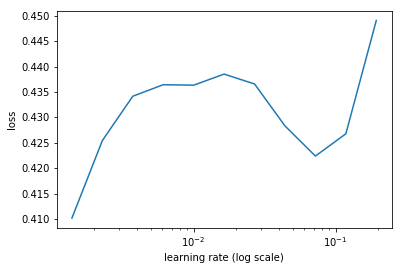

In [23]:
learn.sched.plot()

## Optimal learning rate is approximately 1e-3

In [24]:
learn.unfreeze()
lr=np.array([1e-5,1e-4,1e-3])

In [25]:
learn.fit(lr, 3, cycle_len=1)

 32%|███▏      | 9/28 [00:06<00:13,  1.40it/s, loss=0.513]

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.489536   0.437348   0.772418  
    1      0.495624   0.436982   0.76438                   
    2      0.482949   0.419965   0.785213                  



[0.419964749366045, 0.7852128595113754]

In [26]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

0.8010471204188482

## Data Augmentation
When training for multiple epochs, the model will start overfitting, which basically means the model is learning to recognizing specific images in the training set, rather than generalizing such that it is relevant for other images than just the ones in the training set. 

One quick fix is to effectively create more data, through data augmentation. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

In [27]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [28]:
ims = np.stack([get_augs() for i in range(6)])

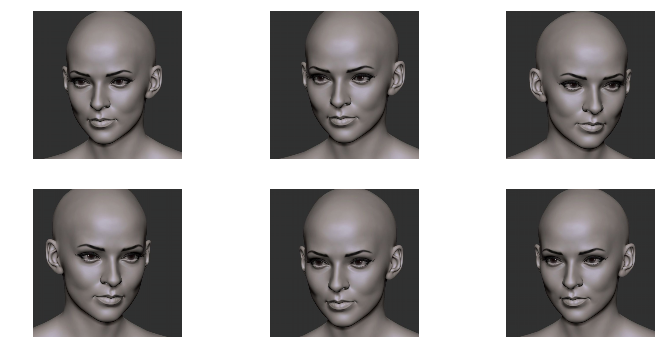

In [29]:
plots(ims, rows=2)

# NOTE: Overfitting

### When *validation loss* >> *training* 

> <div class="alert alert-block alert-info">
Data Augmentation, Increase dropout, unfreeze and use differential learning rates
</div>

## Not very good results: 80% accuracy

### Trying to add differential dropout, and longer training 

In [30]:
ps=[0.1, 0.3, 0.5]

In [31]:
learn = ConvLearner.pretrained(arch, data, ps=ps)
learn.fit(1e-3, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.75244    0.562251   0.71207   
    1      0.631959   0.436883   0.821784                  
    2      0.573066   0.423846   0.824389                  
    3      0.534684   0.402834   0.832201                  
    4      0.496833   0.396023   0.821898                  
    5      0.467053   0.390964   0.819407                  
    6      0.448243   0.391752   0.822011                  



[0.39175179600715637, 0.8220108598470688]

In [32]:
learn.lr_find()

 93%|█████████▎| 26/28 [00:13<00:01,  1.95it/s, loss=1.75] 

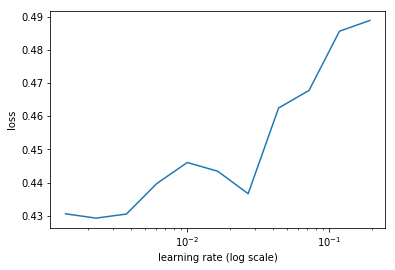

In [33]:
learn.sched.plot()

In [34]:
lr=np.array([1e-4,1e-3,1e-2])

In [35]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

 29%|██▊       | 8/28 [00:06<00:16,  1.22it/s, loss=0.544]

Exception in thread Thread-25:
Traceback (most recent call last):
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.505208   0.399667   0.811255  
    1      0.443424   0.400988   0.842618                  
    2      0.360865   0.397357   0.834805                  
    3      0.307024   0.457617   0.834918                  
    4      0.268838   0.38133    0.87149                   
    5      0.209351   0.42598    0.855865                  
    6      0.165476   0.422072   0.855978                  



[0.4220718629658222, 0.8559782654047012]

In [36]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

0.8534031413612565

## Overfitting --> Increasing dropout 

In [37]:
ps=[0.4, 0.5, 0.9]

In [38]:
learn = ConvLearner.pretrained(arch, data, ps=ps)
learn.fit(1e-3, 3)

epoch      trn_loss   val_loss   accuracy                 
    0      1.311315   0.526673   0.741282  
    1      1.052703   0.465079   0.777627                 
    2      0.900307   0.455864   0.772532                  



[0.45586415380239487, 0.772531695663929]

In [39]:
learn.lr_find()

 89%|████████▉ | 25/28 [00:12<00:01,  2.05it/s, loss=5.46] 

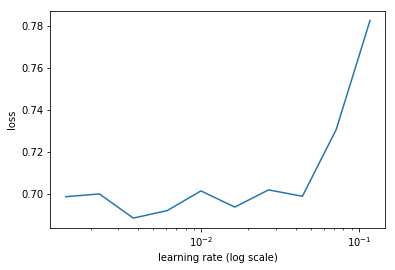

In [40]:
learn.sched.plot()

In [41]:
learn.fit(1e-3, 2, cycle_len=1, cycle_mult=2)

 57%|█████▋    | 16/28 [00:07<00:05,  2.09it/s, loss=0.676]

Exception in thread Thread-38:
Traceback (most recent call last):
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.727062   0.447629   0.790761  
    1      0.680318   0.435327   0.806386                  
    2      0.662482   0.432895   0.808877                  



[0.43289468064904213, 0.8088768050074577]

In [42]:
learn.unfreeze()

In [43]:
lr=np.array([1e-6,1e-4,1e-3])

In [44]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=2, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.691799   0.459145   0.76721   
    1      0.672649   0.471802   0.759398                  
    2      0.646004   0.452415   0.785553                  
    3      0.627343   0.449921   0.782948                  
    4      0.610643   0.436585   0.788157                  
    5      0.598755   0.429957   0.798573                  
    6      0.582433   0.433763   0.795969                  
    7      0.570295   0.434674   0.795969                  
    8      0.562276   0.417087   0.806273                  
    9      0.544399   0.412719   0.79846                   
    10     0.535764   0.412461   0.790761                  
    11     0.525699   0.399684   0.798573                  
    12     0.514867   0.392244   0.801064                  
    13     0.497136   0.391315   0.80899                   
    14     0.489803   0.382819   0.808764                  
    15     0.471421   0.386145   0.814198               

[0.38468244671821594, 0.80638587474823]

### Analyzing Results

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [45]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [46]:
accuracy_np(probs, y)

0.8167539267015707

In [47]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[160  42]
 [ 28 152]]


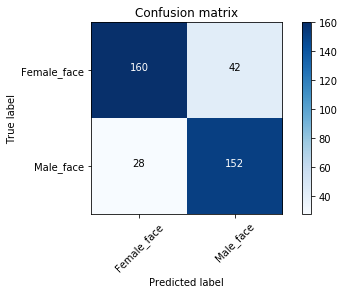

In [48]:
plot_confusion_matrix(cm, data.classes)

# Analyzing the results - vizualising the Images

In [49]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [ ]:
# from here we know that 'female_face' is label 0 and 'male_face' is label 1.
data.classes

In [ ]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

In [ ]:
log_preds[:10]

In [ ]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Correctly classified


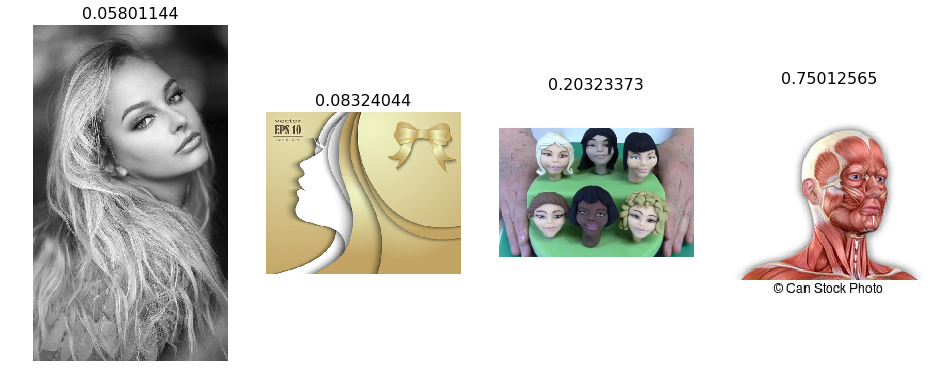

In [58]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


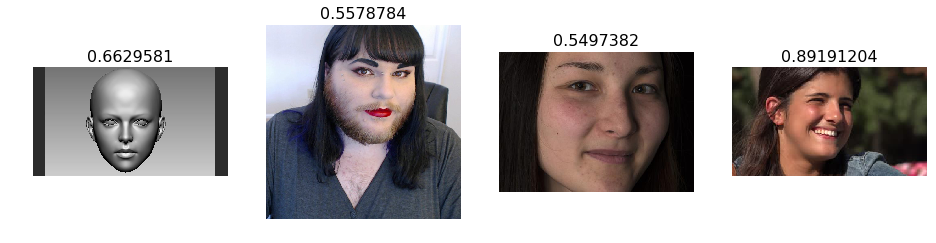

In [59]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [60]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct female faces


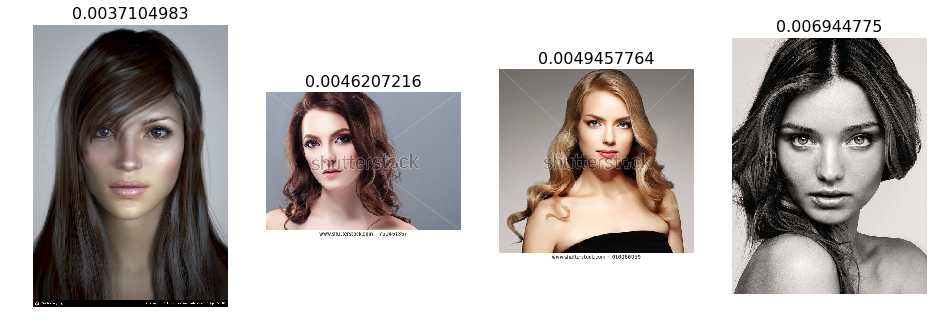

In [61]:
plot_val_with_title(most_by_correct(0, True), "Most correct female faces")

Most correct male faces


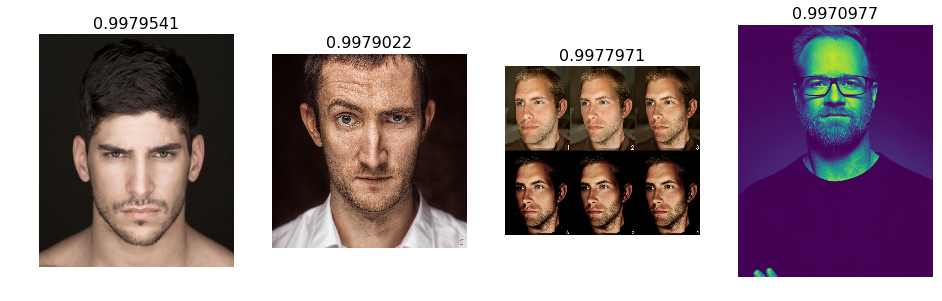

In [62]:
plot_val_with_title(most_by_correct(1, True), "Most correct male faces")

Most incorrect female faces


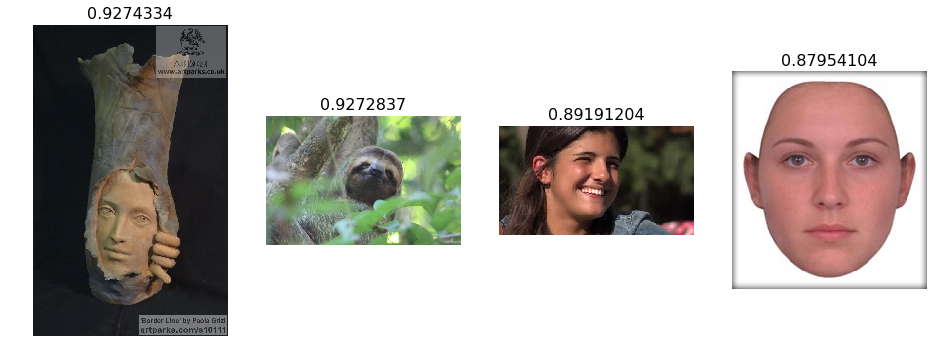

In [63]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect female faces")

Most incorrect male faces


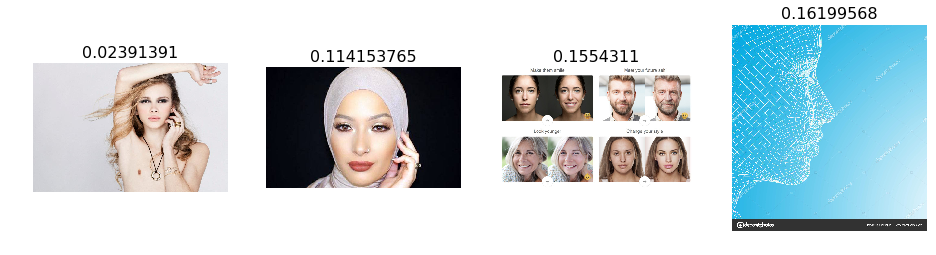

In [64]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect male faces")

Most uncertain predictions


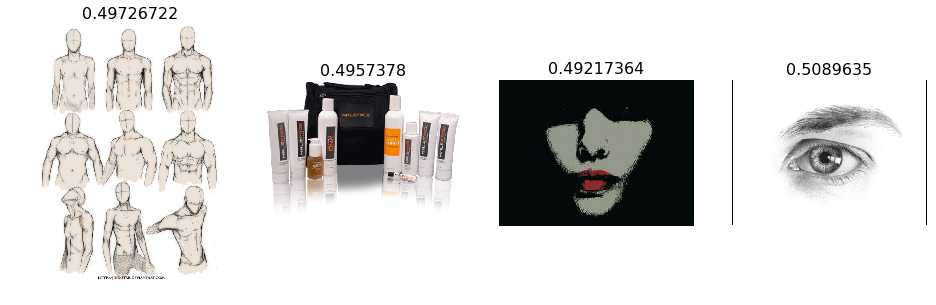

In [65]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

# Conclusion

## When increasing size of image-set the model should improve, but because of the decrease in image-quality and their relevance (as vizualised) it decreases from approximately 90% to 80% accuracy. 

## Though, interesting to see if a more powerful model will have an impact

# Trying with a different model: *Resnet101*

In [66]:
arch = resnet101
sz = 299 # One of two standards for ImageNet (224)
bs = 32 # 64 resulted in cuda-out-of-memory-error

In [81]:
ps = [0.4, 0.6, 0.9]

In [82]:
tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip(), max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=ps)

In [83]:
learn.fit(1e-3, 2)

 40%|████      | 17/42 [00:05<00:08,  2.91it/s, loss=1.65]

Exception in thread Thread-106:
Traceback (most recent call last):
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                 
    0      1.212638   0.443326   0.800868  
    1      0.910604   0.410932   0.811285                  



[0.41093219568332034, 0.8112847208976746]

In [84]:
learn.lr_find()

 83%|████████▎ | 35/42 [00:13<00:02,  2.69it/s, loss=4.53] 

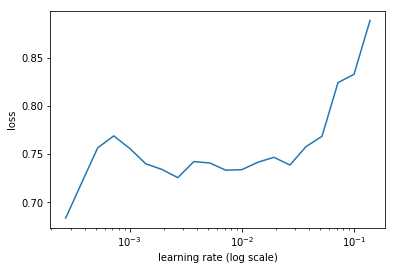

In [85]:
learn.sched.plot()

In [86]:
learn.fit(1e-3, 2, cycle_len=1, cycle_mult=2)

 40%|████      | 17/42 [00:06<00:09,  2.60it/s, loss=0.722]


Exception in thread Thread-123:
Traceback (most recent call last):
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sindre/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.71204    0.407098   0.821701  
    1      0.694494   0.410605   0.821701                  
    2      0.657312   0.406952   0.829514                  



[0.40695184220870334, 0.8295138875643412]

In [87]:
lr = [1e-4, 1e-3, 1e-2]

In [88]:
learn.unfreeze()

In [89]:
learn.fit(lr, 3, cycle_len=3, cycle_mult=4)

epoch      trn_loss   val_loss   accuracy                  
    0      0.706829   0.472572   0.782639  
    1      0.655368   0.522493   0.779861                  
    2      0.627911   0.458815   0.785243                  
    3      0.614697   0.451063   0.811285                  
    4      0.594807   0.426868   0.780035                  
    5      0.56774    0.426991   0.785243                  
    6      0.569514   0.468842   0.808681                  
    7      0.576242   0.42293    0.808681                  
    8      0.533083   0.397142   0.816493                  
    9      0.524407   0.403409   0.82691                   
    10     0.481603   0.444644   0.798264                  
    11     0.478197   0.416624   0.79566                   
    12     0.460738   0.429432   0.821701                  
    13     0.448052   0.406554   0.811285                  
    14     0.483343   0.38101    0.819097                  
    15     0.488244   0.394958   0.832292               

[0.3537925047179063, 0.8585069427887598]

In [90]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [91]:
accuracy_np(probs, y)

0.8717277486910995

In [92]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[172  30]
 [ 19 161]]


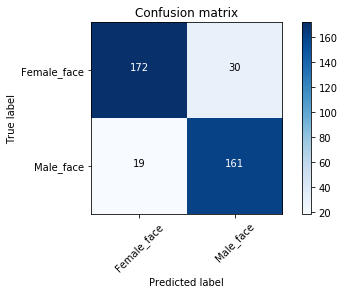

In [93]:
plot_confusion_matrix(cm, data.classes)

# Conclusion

> ## Improving, but still overfitting 
> ### Though, cannot increase the dropout? 